In [28]:
import collections

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

- Why use Differential Equations (or Difference Equations)?
- What is the "solution" of a Differential Equation?
- Why do we need numerical methods (such as Runge-Kutta)?
- Why do we need graphical/geometric approaches (i.e., dynamical systems theory)?

## Example 1: Mass-and-Spring System

**Second-order, ordinary, differential equation** for a "simple frictionless mass-and-spring system" (Norton, 1995, p.48).
<br>
<br>
$$m\ddot{x} + kx = 0 \implies \ddot{x} = -\Big(\frac{k}{m}\Big)x$$

where $m$ is the mass and $k$ is the spring constant.


In [29]:
# system parameters
M = 1.0 # mass constant
K = 1.0 # spring constant

# accelaration as a function of displacement
def xddot(x):
  return -(K/M)*x

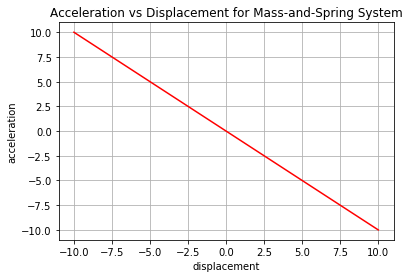

In [30]:
# range of displacement values for plot
xs = np.linspace(-10, 10, num=100)

# values of 2nd derivative over a range of displacements
accels = [xddot(x) for x in xs]

# plotting acceleration vs displacement
fig, ax = plt.subplots()
ax.plot(xs, accels, color='red', label='actual')
ax.set(xlabel='displacement', ylabel='acceleration',
       title='Acceleration vs Displacement for Mass-and-Spring System')
ax.grid()

### Analytical Solution of Mass-and-Spring System

An analytical solution for this is given by (Norton, 1995, p.48)
<br>
<br>
$$x(t) = x_0 \cos\Big(\Big(\sqrt{k/m}\Big)t\Big) + \Big(\sqrt{m/k}\Big)\dot{x_0}\sin\Big({\Big(\sqrt{k/m}\Big)t}\Big)$$
<br>
Recall that a **solution** to an ODE is a function (or family of functions) that specifies the **state** of the dynamical system at any point in time.
<br>
<br>
*What is the "state space" for this problem?*
<br>
<br>
Notice that this equation has two **initial conditions**: 
<br>
<br>
&nbsp;$x_0 \equiv \text{ the initial linear displacement}$, and
<br>
&nbsp;$\dot{x_0} \equiv \text{ the initial velocity.}$

In [31]:
def x_actual(t, x0, xdot0):
  return x0 * np.cos(np.sqrt(K/M)*t) + np.sqrt(M/K)*xdot0*np.sin(np.sqrt(K/M)*t)

### Plotting the analytical solution to the Mass-And-Spring System

In [32]:
# range of time values for plot
ts = np.linspace(0, 25, num=100)

# analytical solution x(t) values over range (for initial conditions x0=10; xdot0=0)
x_actuals = [x_actual(t, x0=10.0, xdot0=0.0) for t in ts]

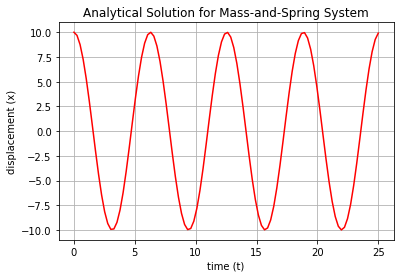

In [33]:
fig, ax = plt.subplots()
ax.plot(ts, x_actuals, color='red', label='actual')
ax.set(xlabel='time (t)', ylabel='displacement (x)',
       title='Analytical Solution for Mass-and-Spring System')
ax.grid()

### Numerical Solution of Mass-and-Spring System

We want to *approximate* this solution using a [Runge-Kutta](https://https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) method.

* [Euler's method](https://https://en.wikipedia.org/wiki/Euler_method) is the *simplest* of the Runge-Kutta methods.
* Specifically, we will use the (forward) **Euler's method**.
* It is an **explicit** method for solving ODEs.
* ["Explicit Runge–Kutta methods are generally unsuitable for the solution of stiff equations because their region of absolute stability is small"](https://https://https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)

**Basic Idea:**

* Recall that a **first-order** ODE gives the **instantaneous rate of change** at a point (e.g., $\dot{x} = f(x, t)$).
<br>
* We can **estimate** the value of $\dot{x_k}$ in terms of $x_{k+1}$, $x_k$, and a step size $\Delta t$:

$$\dot{x_k} \approx \frac{x_{k+1} - x_k}{\Delta t} \implies x_{k+1} \approx x_k + \Delta t \cdot \dot{x_k}$$

Therefore,

1.   Given a chosen starting point $x_0$ (initial state), we can calculate the slope (rate of change) at that point.
2.   We can then calculate the next state by iterating: $x_{k+1} = x_k + \Delta t\cdot \dot{x_k}$
3.   Our chosen $\Delta t$ (the "step size") determines how accurate our approximation of the ODE will be.


![alt text](https://upload.wikimedia.org/wikipedia/commons/1/10/Euler_method.svg)

from Wikipedia (https://en.wikipedia.org/wiki/Euler_method)

In [34]:
DELTA_T = 0.25 # step size

In [35]:
# Using (forward) Euler's method to approximate the solution of a 2nd-order ODE
def x_approx(t, x0, xdot0):
  x = x0  # initial linear displacement
  xdot = xdot0  # initial velocity

  for time in np.arange(0, t, DELTA_T):
    xdot += xddot(x) * DELTA_T
    x += xdot * DELTA_T 
  return x

In [36]:
x_approxs = [x_approx(t, x0=10, xdot0=0) for t in ts]

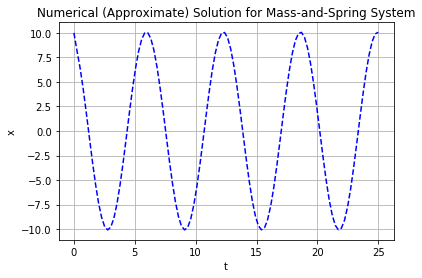

In [37]:
fig, ax = plt.subplots()
ax.plot(ts, x_approxs, color='blue', linestyle='dashed', label='approx')

ax.set(xlabel='t', ylabel='x',
       title='Numerical (Approximate) Solution for Mass-and-Spring System')
ax.grid()

### Comparing Analytical and Approximate Solutions

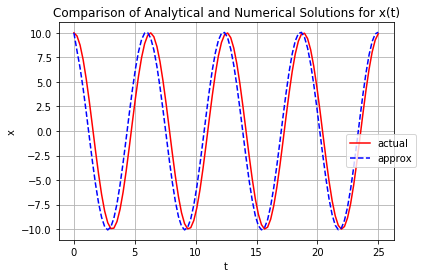

In [38]:
fig, ax = plt.subplots()
ax.plot(ts, x_actuals, color='red', label='actual')
ax.plot(ts, x_approxs, color='blue', linestyle='dashed', label='approx')

ax.set(xlabel='t', ylabel='x',
       title='Comparison of Analytical and Numerical Solutions for x(t)')
ax.grid()

_ = fig.legend(bbox_to_anchor=(0.8, 0.5), loc='upper left', borderaxespad=0.)

### Converting the Second-Order System into a First-Order System

Let $u = \dot{x}$, then

$
\qquad\dot{u} = -(\frac{k}{m})x\\
\qquad\dot{x} = u
$


In [39]:
def udot(x):
  return -(K/M)*x

def xdot(u):
  return u

### Plotting a Vector Field for the Mass-and-Spring System

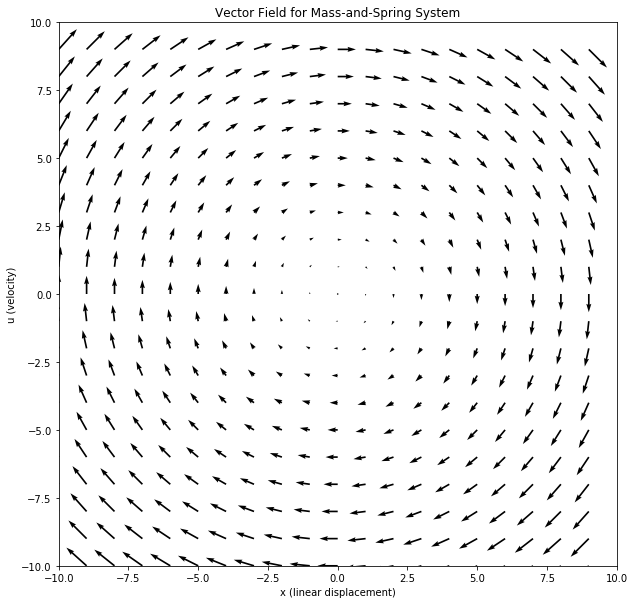

In [40]:
w = 10

xs, us = np.mgrid[-w:w, -w:w]

udots = udot(xs)
xdots = xdot(us)

fig, ax = plt.subplots(figsize=(10, 10))

plt.xlim(-w, w)
plt.ylim(-w, w)

_ = ax.quiver(xs, us, xdots, udots)
_ = ax.set(xlabel='x (linear displacement)', 
           ylabel='u (velocity)', 
           title='Vector Field for Mass-and-Spring System')

plt.show()

## Example 2: Linear System of Differential Equations (from Norton p.48) 
$
\dot{x} = x + z\\
\dot{y} = 2x + y - z\\
\dot{z} = 3y + 4z\\
$

In [41]:
def xdot(state):
  x,y,z = state
  return x + z

In [42]:
def ydot(state):
  x,y,z = state
  return 2*x + y - z

In [43]:
def zdot(state):
  x,y,z = state
  return 3*y + 4*z

### Plot a 3D Vector Field

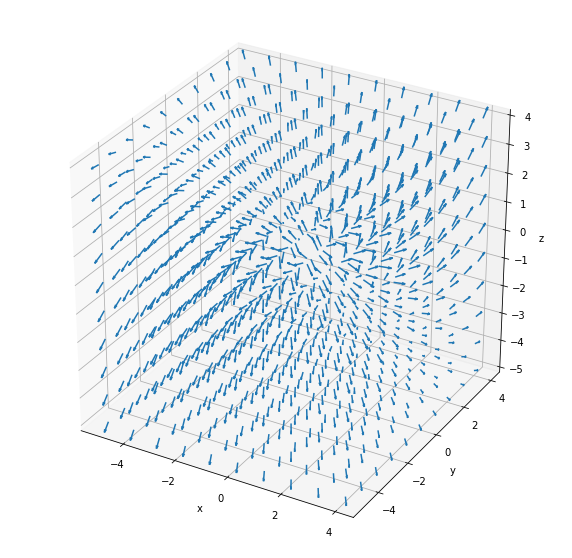

In [44]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

# construct (cubic) state grid
w = 5
zs, ys, xs = np.mgrid[-w:w, -w:w, -w:w]

# calculate the derivatives
xdots = xdot([xs,ys,zs])
ydots = ydot([xs,ys,zs])
zdots = zdot([xs,ys,zs])

# plot the vector field
ax.quiver(xs, ys, zs, xdots, ydots, zdots, length=0.4, normalize=True)
ax.set(xlabel='x', ylabel='y', zlabel='z')

plt.show()

### Plot a 2D "Stream Field"

In [45]:
# construct grid of all states to evaluate derivative
# (zs are fixed to allow 2D plot)
ys, xs = np.mgrid[-w:w, -w:w]

In [46]:
# flatten z values (2D slice of 3D plot)
fixed_z = 1
zs = np.ones(xs.shape) * fixed_z

In [47]:
xdots = xdot([xs,ys,zs])
ydots = ydot([xs,ys,zs])
zdots = zdot([xs,ys,zs])

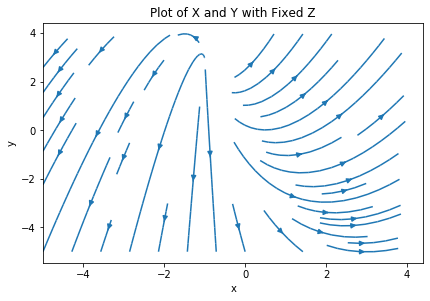

In [48]:
fig = plt.figure(figsize=(15, 20))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])
ax0 = fig.add_subplot(gs[0, 0])
ax0.set(xlabel='x', ylabel='y', title='Plot of X and Y with Fixed Z')
_ = ax0.streamplot(xs, ys, xdots, ydots, density=[0.5, 1])

### Check a few derivative values!

In [49]:
state = [-3, 0, fixed_z]

xdot_value = xdot(state)
ydot_value = ydot(state)
zdot_value = zdot(state)

print(xdot_value, ydot_value, zdot_value)

-2 -7 4


## Example 3: Non-Linear System of Differential Equations (Norton, 1995, p. 49)

Second-Order Form:

$
\qquad\ddot{x} = \dot{x} - y^3\\
\qquad\ddot{y} = -\dot{y} + x^3
$

First-Order Form:

$
\qquad\dot{x} = u\\
\qquad\dot{y} = v\\
\qquad\dot{u} = u - y^3\\
\qquad\dot{v} = -v + x^3
$


In [50]:
def xdot(state):
  x,y,u,v = state
  return u

def ydot(state):
  x,y,u,v = state
  return v

def udot(state):
  x,y,u,v = state
  return u - y**3

def vdot(state):
  x,y,u,v = state
  return -v + x**3

In [51]:
# vector field (F) with 4 "component functions" (see Norton, 1995, p. 50)
def F(state, t, params=None):
  x,y,u,v = state

  return [xdot(state), ydot(state), udot(state), vdot(state)]

In [52]:
initial_state = [0.5,0.1,0,0]

ts = np.linspace(0,6,1000)

# uses LSODA algorithm
approx_sol = odeint(F, initial_state, ts)

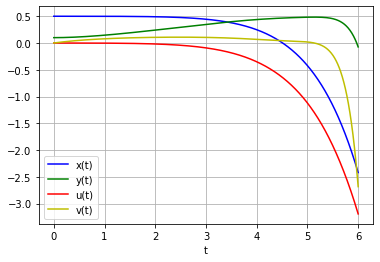

In [53]:
xs = approx_sol[:,0]
ys = approx_sol[:,1]
us = approx_sol[:,2]
vs = approx_sol[:,3]

plt.plot(ts, xs, 'b', label='x(t)')
plt.plot(ts, ys, 'g', label='y(t)')
plt.plot(ts, us, 'r', label='u(t)')
plt.plot(ts, vs, 'y', label='v(t)')

plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

## Example 4: Lorenz Equations (Chaotic System)

$\dot{x} = \sigma(y-x)$
<br>
$\dot{y} = x(\rho-z)-y$
<br>
$\dot{z} = xy - \beta z$
<br>

**Variables**:&nbsp;$x$,$y$,$z$
<br>
**Parameters**:&nbsp;$\sigma$,$\rho$,$\beta$

Has *chaotic* solutions for some parameter values.

* For small values of $\rho$, the system is stable and approaches one of two fixed point attractors. 
* When $\rho > 23.85$, the bifurcates.

In [79]:
# system parameters
sigma = 10
rho = 25
beta = 8.0/3.0

In [80]:
# system of differential equations
def xdot(state):
    x,y,z = state
    return sigma*(y-x)

def ydot(state):
    x,y,z = state
    return x*(rho - z) - y

def zdot(state):
    x,y,z = state
    return x*y - beta*z

In [81]:
# vector field with 3 component functions
def F(state, t, params=None):
  x,y,z = state

  return [xdot(state), ydot(state), zdot(state)]

### Numerical (Approximate) Solution

In [82]:
initial_state = [1.01, 1.0, 1.0]

t_final = 50
delta_t = 0.001

ts = np.linspace(0, t_final, int(t_final/delta_t))

# uses LSODA algorithm (numerical solver)
approx_sol = odeint(F, initial_state, ts)

xs = approx_sol[:,0]
ys = approx_sol[:,1]
zs = approx_sol[:,2]

plt.plot(ts, xs, 'b', label='x(t)')
plt.plot(ts, ys, 'g', label='y(t)')
plt.plot(ts, zs, 'r', label='z(t)')

plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [83]:
final_state = xs[-1], ys[-1], zs[-1]

<IPython.core.display.Javascript object>


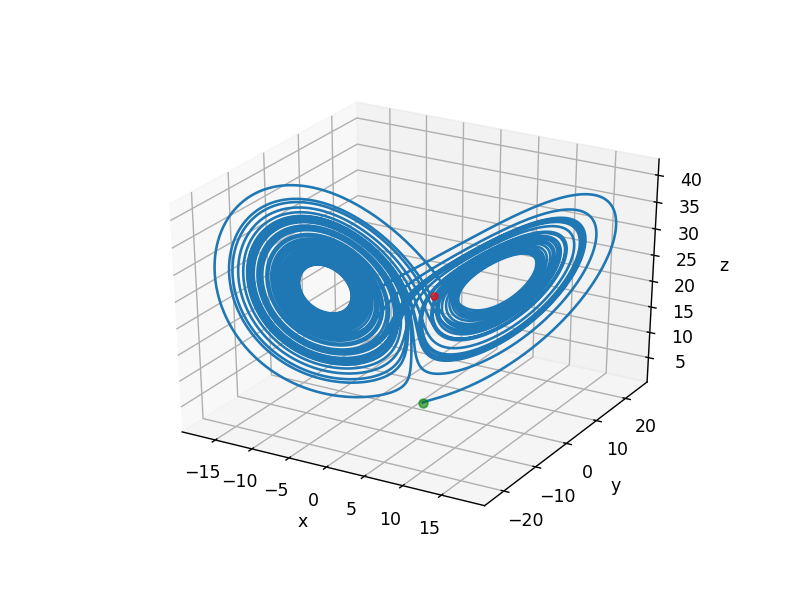

In [84]:
# interactive mode (not available in jupyter lab!)
%matplotlib notebook 

fig = plt.figure()
ax = fig.gca(projection='3d')

# 3d plot of solution trajectory
ax.plot(approx_sol[:, 0], approx_sol[:, 1], approx_sol[:, 2])

# plot starting point
ax.plot([initial_state[0]], [initial_state[1]], [initial_state[2]], color='g', marker='o', markersize=5, alpha=0.6)

# plot final point
ax.plot([final_state[0]], [final_state[1]], [final_state[2]], color='r', marker='o', markersize=4, alpha=0.6)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.draw()
plt.show()

### Sensitivity to Initial Conditions

In [139]:
# Different initial conditions with small perturbations in each axis
initial_states = np.array([[1.0, 1.0, 1.0],
                           [1.0 + 10**-9, 1.0, 1.0],
                           [1.0, 1.0 + 10**-9, 1.0],
                           [1.0, 1.0, 1.0 + 10**-9],])

final_states = []

for initial_state in initial_states:
    approx_sol = odeint(F, initial_state, ts)
    
    xs = approx_sol[:,0]
    ys = approx_sol[:,1]
    zs = approx_sol[:,2]
    
    final_state = xs[-1], ys[-1], zs[-1]    
    final_states.append(final_state)
    
final_states = np.array(final_states)

In [140]:
final_states[:,0]

array([13.03545542, -3.00892922,  0.28490602, 13.9616094 ])

<IPython.core.display.Javascript object>


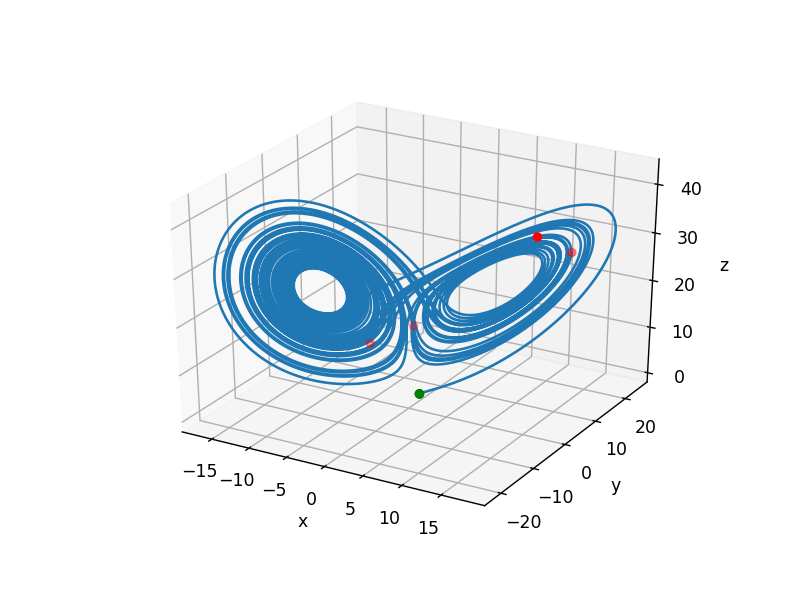

In [141]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(approx_sol[:, 0], approx_sol[:, 1], approx_sol[:, 2])
ax.scatter(initial_states[:,0], initial_states[:,1], initial_states[:,2], color='g')
ax.scatter(final_states[:,0], final_states[:,1], final_states[:,2], color='r')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()